<a href="https://colab.research.google.com/github/Sushila-Phogat/Data-science-with-Python/blob/master/Profusion_hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/Sushila-Phogat/Data-science-with-Python/master/hotel_bookings.csv')

df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [0]:
df=df[df['hotel']=='Resort Hotel']

In [3]:
df.groupby('is_canceled').size()

is_canceled
0    5147
1    2080
dtype: int64

In [4]:
df.groupby('partner_ID')['total_cost'].sum().sort_values(ascending=False)

partner_ID
6     76990
15    74780
12    74680
18    74430
24    73930
27    73030
14    71850
28    70460
19    69880
11    69480
13    68530
7     68350
2     68320
4     67400
16    66840
1     66370
25    65770
8     65460
22    64030
23    64010
21    63600
29    63150
3     62880
30    62140
9     61400
20    61070
5     60450
17    60070
10    58370
26    56960
Name: total_cost, dtype: int64

In [5]:
df[df['is_canceled']==0].groupby('partner_ID')['total_cost'].sum().sort_values(ascending=False)

partner_ID
24    54330
15    53100
28    51940
12    51100
16    50950
27    50230
2     49690
11    49300
14    48540
18    48200
13    47370
7     46500
25    45970
6     45930
3     45700
8     45360
4     45240
9     45160
29    44650
19    44520
23    44090
22    43990
1     43940
30    43880
10    42700
17    42520
20    41160
5     40050
21    39350
26    38480
Name: total_cost, dtype: int64

In [6]:
df[df['is_canceled']==0].groupby('partner_ID')['total_cost'].max().sort_values(ascending=False)


partner_ID
11    4250
24    3720
30    1810
4     1770
28    1720
7     1720
18    1720
3     1540
5     1490
12    1490
2     1340
25    1310
13    1010
1     1010
21    1010
14     940
26     940
27     930
15     930
16     910
9      910
6      910
19     890
22     880
20     870
29     860
17     860
10     860
8      860
23     740
Name: total_cost, dtype: int64

In [7]:
df[df['is_canceled']==1].groupby('partner_ID')['total_cost'].count().sort_values(ascending=False)

partner_ID
6     97
18    81
24    80
21    79
12    78
15    77
5     77
19    77
1     73
23    72
13    72
4     71
27    70
14    69
7     69
25    67
2     67
11    66
8     66
20    66
22    65
30    65
29    64
16    61
3     61
28    60
26    59
9     58
17    58
10    55
Name: total_cost, dtype: int64

In [8]:
df[df['is_canceled']==1].groupby('partner_ID')['total_cost'].max().sort_values(ascending=False)

partner_ID
4     1720
14    1560
8     1490
11    1470
1     1290
13    1290
18    1290
19    1290
21    1220
3     1150
26    1140
7     1060
6     1060
27    1060
10    1060
20     910
16     910
9      860
2      860
30     860
12     860
29     860
23     860
25     860
28     860
15     860
17     760
22     710
24     710
5      620
Name: total_cost, dtype: int64

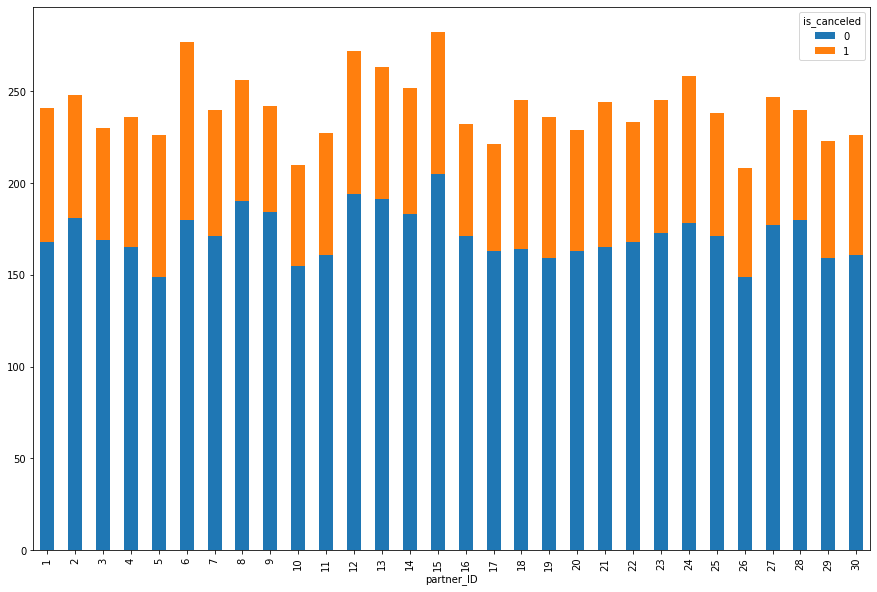

In [9]:

df.groupby(['partner_ID','is_canceled']).size().unstack().plot(kind='bar',stacked=True, figsize=(15,10))
plt.show()

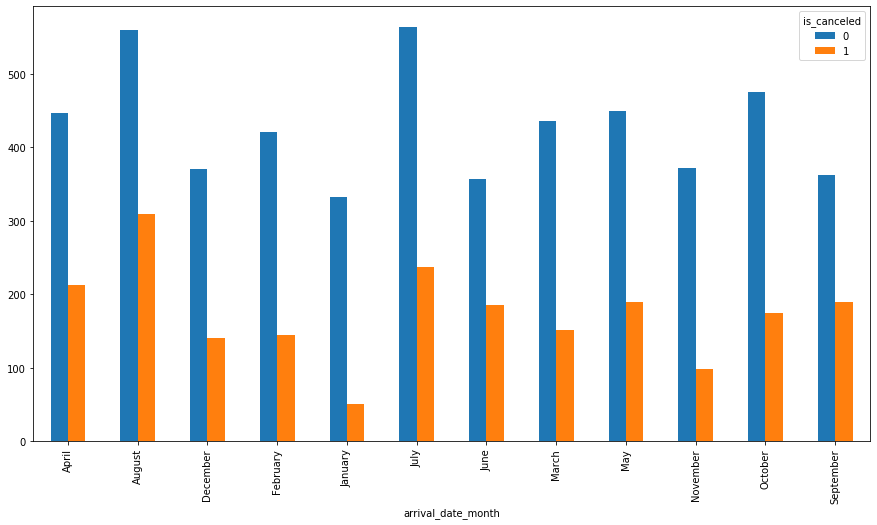

In [10]:
df.groupby(['arrival_date_month','is_canceled']).size().unstack().plot(kind='bar',stacked=False, figsize=(15,8))
plt.show()

In [12]:
df[df['is_canceled']==1]

,partner_ID,hotel,is_canceled,total_cost,days_betwee_reservation_and_check_in,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_booked,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1,21,Resort Hotel,1,150,75,2015,July,27,1,0,3,2,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,D,D,0,0,0,Canceled,22/04/2015
7,27,Resort Hotel,1,150,63,2015,July,27,3,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,0,2,Canceled,18/06/2015
8,25,Resort Hotel,1,100,62,2015,July,27,3,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,D,D,0,0,1,Canceled,03/07/2015
14,19,Resort Hotel,1,1290,79,2015,July,27,3,6,15,2,1.0,0,BB,Offline TA/TO,TA/TO,0,0,0,A,A,0,0,2,Canceled,15/04/2015
20,3,Resort Hotel,1,50,33,2015,July,27,4,0,1,2,0.0,0,BB,Online TA,TA/TO,0,0,0,D,D,0,0,0,Canceled,16/06/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,26,Resort Hotel,1,50,0,2016,March,12,18,0,1,1,0.0,0,BB,Corporate,Corporate,1,0,1,A,A,0,0,0,Canceled,18/03/2016
4723,3,Resort Hotel,1,100,16,2016,September,39,21,0,1,1,0.0,0,BB,Corporate,Corporate,1,3,2,E,E,0,0,0,Canceled,06/09/2016
4724,13,Resort Hotel,1,50,5,2016,October,42,12,0,1,1,0.0,0,BB,Corporate,Corporate,1,4,2,E,E,0,0,0,Canceled,07/10/2016
5369,16,Resort Hotel,1,90,1,2016,October,45,30,1,0,2,0.0,0,BB,Direct,Direct,0,0,0,A,A,0,0,0,No-Show,30/10/2016


In [17]:
df.columns

Index(['partner_ID', 'hotel', 'is_canceled', 'total_cost',
       'days_betwee_reservation_and_check_in', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal_booked',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder
# convert a string variable to a categorical one
df[["arrival_date_month"]] = df[["arrival_date_month"]].apply(LabelEncoder().fit_transform)
df[["meal_booked"]] = df[["meal_booked"]].apply(LabelEncoder().fit_transform)
df[["market_segment"]] = df[["market_segment"]].apply(LabelEncoder().fit_transform)
df[["distribution_channel"]] = df[["distribution_channel"]].apply(LabelEncoder().fit_transform)
df[["reserved_room_type"]] = df[["reserved_room_type"]].apply(LabelEncoder().fit_transform)
df[["assigned_room_type"]] = df[["assigned_room_type"]].apply(LabelEncoder().fit_transform)
df[["reservation_status"]] = df[["reservation_status"]].apply(LabelEncoder().fit_transform)
df[["reservation_status_date"]] = df[["reservation_status_date"]].apply(LabelEncoder().fit_transform)

df

,partner_ID,hotel,is_canceled,total_cost,days_betwee_reservation_and_check_in,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_booked,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,25,Resort Hotel,0,50,7,2015,5,27,1,0,1,1,0.0,0,0,2,1,0,0,0,0,2,0,0,0,1,43
1,21,Resort Hotel,1,150,75,2015,5,27,1,0,3,2,0.0,0,2,4,2,0,0,0,2,3,0,0,0,0,596
2,18,Resort Hotel,0,430,127,2015,5,27,1,2,5,2,0.0,0,2,4,2,0,0,0,2,8,0,0,1,1,14
3,2,Resort Hotel,0,910,95,2015,5,27,1,4,11,2,0.0,0,0,4,2,0,0,0,2,3,0,0,0,1,434
4,18,Resort Hotel,0,240,36,2015,5,27,2,1,3,3,0.0,0,0,5,2,0,0,0,2,3,0,0,1,1,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7222,23,Resort Hotel,0,370,206,2017,1,35,31,2,4,3,0.0,0,0,2,1,0,0,0,2,3,0,1,1,1,166
7223,2,Resort Hotel,0,430,151,2017,1,35,31,2,5,2,0.0,0,0,2,1,0,0,0,0,0,0,0,0,1,193
7224,12,Resort Hotel,0,500,194,2017,1,35,31,2,5,2,1.0,0,2,5,2,0,0,0,5,6,3,1,1,1,193
7225,12,Resort Hotel,0,860,270,2017,1,34,25,4,10,2,0.0,0,2,4,2,0,0,0,2,3,0,0,0,1,221


In [0]:
features=[ 'total_cost',
       'days_betwee_reservation_and_check_in', 'arrival_date_year',
       'arrival_date_month',
        'stays_in_weekend_nights',
        'adults', 'children', 
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 
       
        'reservation_status_date']

# prepare train and target
data=df
data=data.drop(['stays_in_week_nights','previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes','meal_booked','total_of_special_requests','arrival_date_week_number','required_car_parking_spaces','is_canceled','hotel','reservation_status','arrival_date_day_of_month','previous_cancellations','babies','partner_ID'],axis=1)
target=df['is_canceled']

[ 1  7  2  9  8  5  6  3  0  4 10]
Feature ranking:
1. days_betwee_reservation_and_check_in (0.259880)
2. market_segment (0.186298)
3. arrival_date_year (0.165395)
4. is_repeated_guest (0.134731)
5. distribution_channel (0.131785)
6. adults (0.037469)
7. children (0.036756)
8. arrival_date_month (0.028963)
9. total_cost (0.009936)
10. stays_in_weekend_nights (0.004616)
11. previous_cancellations (0.004174)


(0, 0.5513704543961632)

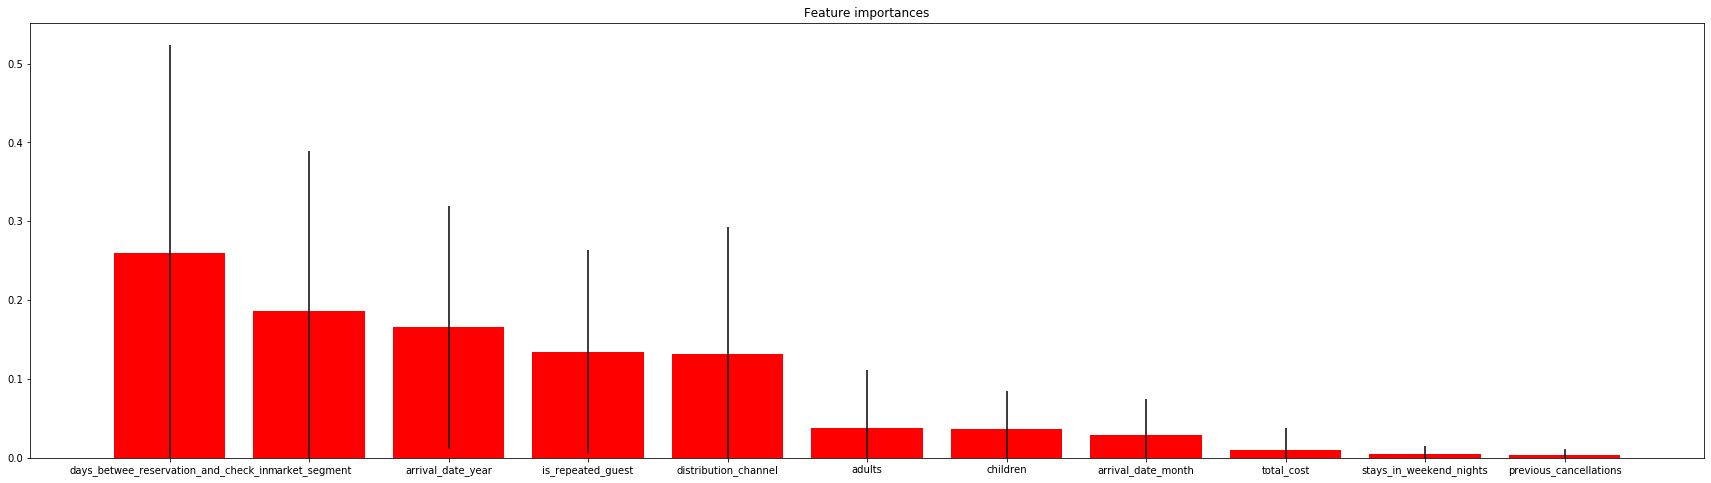

In [94]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(data.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(data.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(data.shape[1]), np.array(features)[indices])
plt.xlim([-1, data.shape[1]])
fig.set_size_inches(30,8)
axes = plt.gca()
axes.set_ylim([0,None])

In [92]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import accuracy_score as acc
from sklearn.ensemble import ExtraTreesClassifier

# prepare train and target
data=df
data=data.drop(['stays_in_week_nights','previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes','meal_booked','total_of_special_requests','arrival_date_week_number','required_car_parking_spaces','is_canceled','hotel','reservation_status','arrival_date_day_of_month','previous_cancellations','babies','partner_ID'],axis=1)
target=df['is_canceled']
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes

clf = ExtraTreesClassifier(n_estimators=100, max_depth=4)
skf = StratifiedKFold(n_splits=10)
score=[]
for train,test in skf.split(data, target):
  clf.fit(data.iloc[train],target.iloc[train])
  y_pred=clf.predict(data.iloc[test])
  y_true=target[test]
  score.append(acc(y_true,y_pred))
score
# summarize the selection of the attributes

print(rfe.classes_, rfe.ranking_)

[0 1] [1 1 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3]


Min: -20.000000, Max: 4250.000000
(array([5.283e+03, 1.742e+03, 1.750e+02, 1.900e+01, 6.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


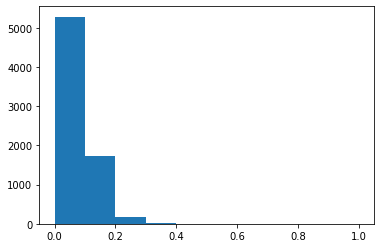

In [122]:
from sklearn.preprocessing import MinMaxScaler
# train the normalization
series=df['total_cost']
values = series.values
values = values.reshape((len(values), 1))
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize the dataset and print the first 5 rows
normalized = scaler.transform(values)
print(plt.hist(normalized))

28      640
32      250
112     660
121     350
156     430
       ... 
7112    430
7120    100
7132    100
7161    430
7205    210
Name: total_cost, Length: 241, dtype: int64